# Naïve bayes 
teoria

## **Aprendizagem**

- abordagem probabilistica(teorema de bayes);
- Exemplos: Filtro de spam, Mineração de emoção, Separação de documentos;
- é um bom algoritmo para classificação de *textos* 
- Faremos uma tabela de probabilidade, onde para cada coluna previsora, dados a distribuição comparando os possiveis valores que essa coluna pode assumir com os possiveis valores do nosso Y. ou seja, para cada valor de Y, distribuimos a chance de ele estar relacionado com a caracteristica A, B ou C da nossa coluna previsora



```
coluna 1:
................valorA........ValorB..........ValorC
(5/13)Y='boa..... 3/5...........1/5............1/5   
(6/13)Y='medio'...1/6...........3/6............2/6    
(2/13)Y='ruim'....1/2...........0/2............1/6

coluna 2:
................valorA........ValorB..........ValorC
(5/13)Y='boa..... 2/5...........3/5............0/5
(6/13)Y='medio'...1/6...........2/6............3/6
(2/13)Y='ruim'....0/2...........1/2............1/6
```

- No primiro caso, temos 5 registros como boa, desses 5, 3 tem valor A na coluna 1, 1 valor B, 1 Valor C
- no segundo, temos 6 registros de media, desses 6, 1 tem valor A na coluna 1, 3 tem valor B na coluna 1, ...
- fazemos isso para todas as colunas



## **Fazendo previsões**

- Caso tenhamos uma linha onde: coluna1 = ValorC, coluna2 = ValorB
- P(boa) = 5/13* 1/5 * 3/5 
- p(medio) = 2/13 * 2/6 * 2/6 
- P(ruim) = 2/13 * 1/6 * 1/2 

- apos isso, somamos as 3 probabilidades e falamos que isso é o 100%, depois fazemos uma regra de 3 pra estimar a probabilidade de cada um dos valores de Y





## **Correção laplaciana**

- Em alguns casos vamos ter que todas as probabilidades de Y vão ser 0, o que fazer quando isso acontecer? 
1. Nesse caso, adicionamos um valor ao valor da coluna que é zero, por exemplo, caso ValorA do Y='boa' for 0/3, faremos ele ficar 1/4, e isso muda tudo nos calculos, pois o numero de Y='boa' vai de 5/13 para 6/14, e todos os outros vao aumentar 1 no denominador

# Naïve bayes 
Pratica

In [ ]:
from sklearn.naive_bayes import GaussianNB

## base de risco de crédito

In [ ]:
# base de risco de crédito
import pandas as pd
df_rc = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/risco_credito.csv')

In [ ]:
df_rc

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
df_rc.shape

(14, 5)

In [ ]:
# Dividindo previsoes e previstos
X_rc = df_rc.iloc[:, 0:4].values
y_rc = df_rc.iloc[:, 4].values

In [ ]:
# Tirando variaveis categoricas(label encoder)
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
X_rc[:,0] = label_encoder_historia.fit_transform(X_rc[:,0])
X_rc[:,1] = label_encoder_divida.fit_transform(X_rc[:,1])
X_rc[:,2] = label_encoder_garantia.fit_transform(X_rc[:,2])
X_rc[:,3] = label_encoder_renda.fit_transform(X_rc[:,3])

In [ ]:
X_rc

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

Nao vamos fazer a aplicação do OneHotEncoder pois a base de dados é bastante pequena

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_rc, y_rc], f)

In [ ]:
naive_rc = GaussianNB()
naive_rc.fit(X_rc, y_rc)

GaussianNB()

In [ ]:
# historia = boa(0), divida = alta(0), garantidas = nenhuma(1), renda >= 35(2)
# historia = ruim(2), divida = alta(0), garantidas = adequada(0), renda <= 15(0)
previsao = naive_rc.predict([[0,0,1,2], [2,0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_rc.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_rc.class_prior_
# 42% estao em alto, 35% em baixo, 21% em moderado

array([0.42857143, 0.35714286, 0.21428571])

##Base credit data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/credit_data.csv')

In [ ]:
df.head(5) # 0 -> pagou , 1 -> nao pagou

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
# Primeiramente varemos o upload dos X e y salvos anteriormente
import pickle
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /credit.pkl', 'rb') as f:
  X_credit_train, X_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [ ]:
X_credit_train

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [ ]:
X_credit_train.shape

(1500, 3)

In [ ]:
y_credit_train.shape

(1500,)

In [ ]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_train, y_credit_train)

GaussianNB()

In [ ]:
previsoes = naive_credit.predict(X_credit_test)

In [ ]:
previsoes # Previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test # Resposta real

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
accuracy_score(y_credit_test, previsoes)

0.938

Matriz de confusão

- 0 : pagou
- 1 : nao pagou

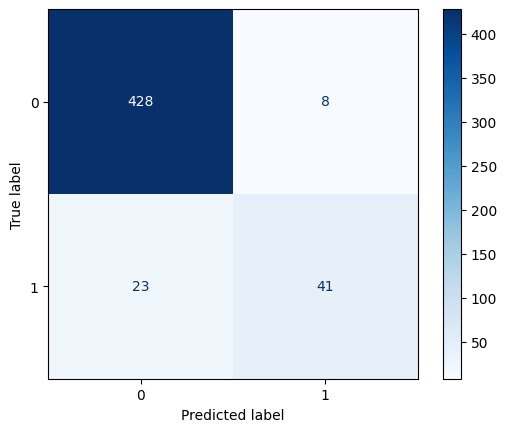

In [ ]:
cm = confusion_matrix(y_credit_test, previsoes)
fig, ax = plt.subplots()
cm_display = ConfusionMatrixDisplay(cm, display_labels=naive_credit.classes_)
cm_display.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

0.938

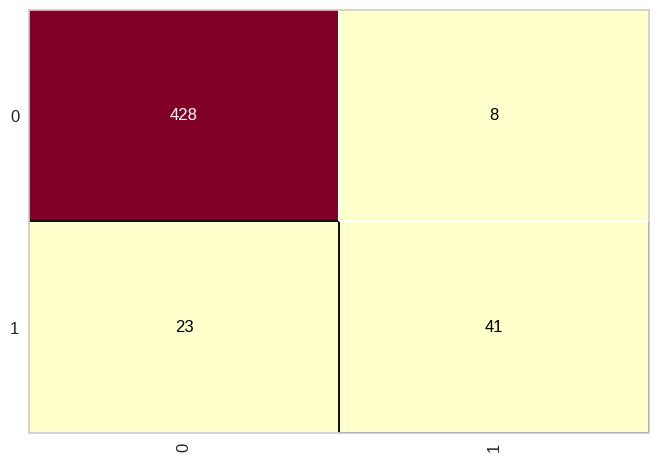

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, previsoes)) # Identificamos que o algoritmo nao tem um bom desempenho em calcular os clientes que nao pagam o emprestimo

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base de dados census

In [ ]:
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /census.pkl', 'rb') as f:
  X_census_train, X_census_test, y_census_train, y_census_test = pickle.load(f)

In [ ]:
X_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [ ]:
X_census_test.shape,  y_census_test.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_train, y_census_train) # criando a tabela de probabilidade
previsoes = naive_census.predict(X_census_test)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_test, previsoes)

0.4767656090071648

0.4767656090071648

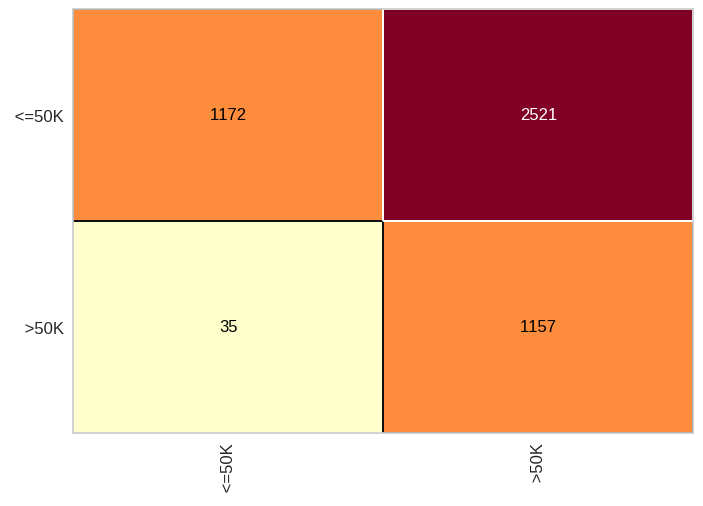

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

